<h1>
<font color="#ff2e2e">
Color Space Conversion
</font>
</h1>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<div dir="rtl">
    الف)تبدیل از فضای RGB به فضای CMYK و بالعکس
</div>

In [3]:
def RGB_to_CMYK(RGB_array):
    K = 1 - np.round((max(RGB_array) / 255), 2) # scale is percentage(0 to 1) of black ink
    CMYK_array = [0, 0, 0, K] # in CMYK format
    CMYK_array[0:3] = ([1 - K] * 3) - np.round((np.array(RGB_array) / 255), 2) # scale is percentage(0 to 1) of cyan, magenta and yellow ink
    return CMYK_array

def CMYK_to_RGB(CMYK_array):
    K = CMYK_array[3]
    RGB_array = np.round(np.array(([1 - K] * 3) - (np.array(color_CMYK[0:3]))) * 255)
    # change to int
    RGB_array = RGB_array.astype(int)
    return RGB_array

color_RGB = [50, 70, 130] # in RGB format
print("RGB: ", color_RGB)

# change to CMYK format
color_CMYK = RGB_to_CMYK(color_RGB)
print("CMYK: ", color_CMYK)

# back to RGB format from CMYK format
color_RGB_from_CMYK = CMYK_to_RGB(color_CMYK)
print("RGB from CMYK: ", color_RGB_from_CMYK)


RGB:  [50, 70, 130]
CMYK:  [0.31, 0.24, 0.0, 0.49]
RGB from CMYK:  [ 51  69 130]


<h3><font color = "#079e05"> BGR to YCbCr </font></h3>

In [4]:
def convert_to_ycbcr(image):
    '''
    Converts the color space of the input image to the YCbCr color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    # Your code #
    # BGR to YCbCr
    result = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb) 
    # https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html
    # https://stackoverflow.com/questions/23396501/how-to-convert-an-rgb-image-to-ycrcb-colour-space-in-opencv-python
    #############
    
    return result

<h3><font color = "#079e05"> BGR to HSV </font></h3>

In [5]:
def convert_to_hsv(image):
    '''
    Converts the color space of the input image to the HSV color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    # Your code #
    result = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html
    # https://www.geeksforgeeks.org/python-opencv-cv2-cvtcolor-method/
    #############
        
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

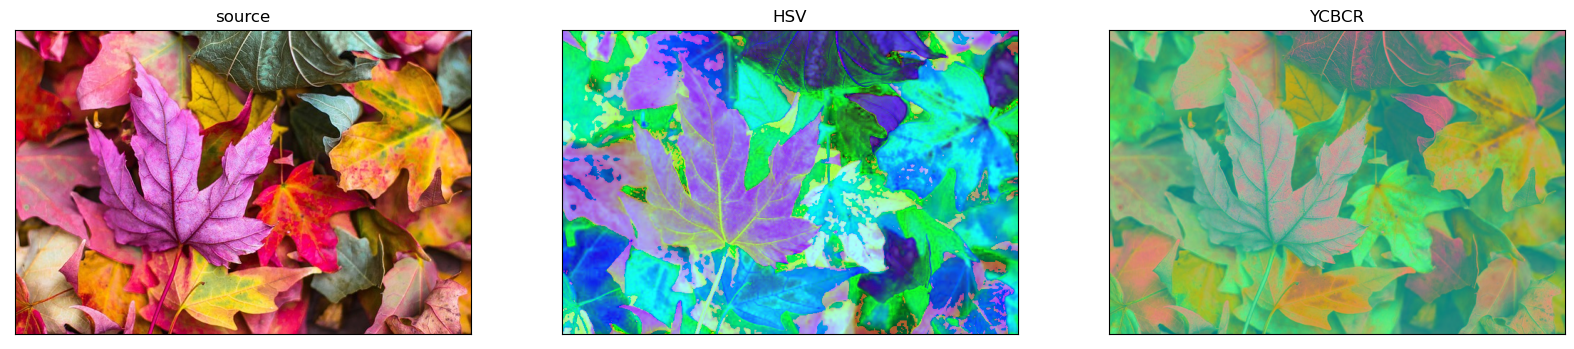

In [6]:
image_list = []
image = cv2.imread(os.path.join('images/Q1', '1.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([convert_to_hsv(image), 'HSV', 'img'])
image_list.append([convert_to_ycbcr(image), 'YCBCR', 'img'])
plotter(image_list,1 , 3, True, 20, 10, '2A')

<div dir="rtl">
    عکس  1.jpgبه صورت کانالهای مجزا  H, S, Vنمایش دهید.
</div>

(427, 640, 3)


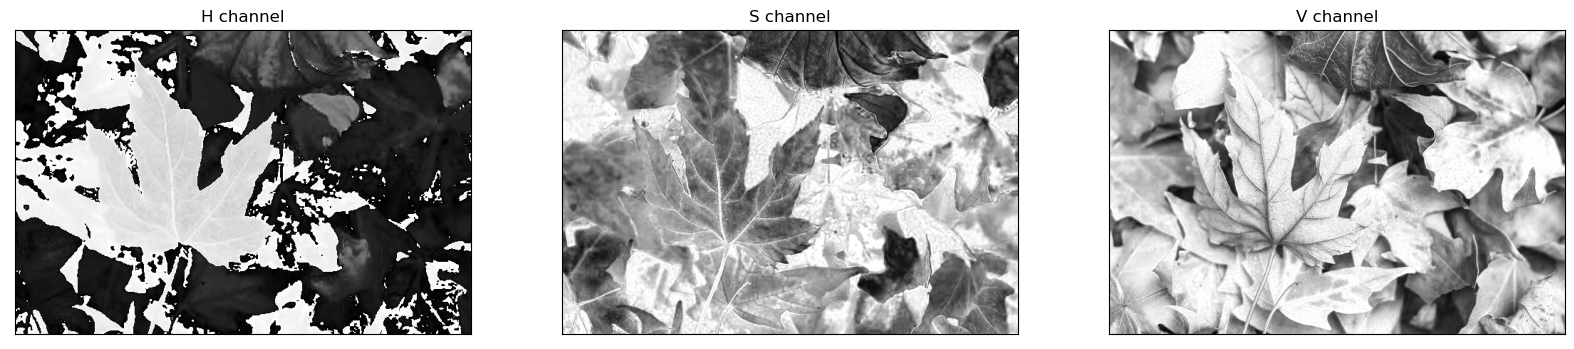

In [7]:
# https://www.codespeedy.com/splitting-rgb-and-hsv-values-in-an-image-using-opencv-python/

hsv_img = convert_to_hsv(image)
print(hsv_img.shape)
# h_channel, s_channel, v_channel = cv2.split(hsv_img)
h_channel = hsv_img[:, :, 0]
s_channel = hsv_img[:, :, 1]
v_channel = hsv_img[:, :, 2]
# show histogram of each channel
image_list = []
image_list.append([h_channel, 'H channel', 'img'])
image_list.append([s_channel, 'S channel', 'img'])
image_list.append([v_channel, 'V channel', 'img'])
plotter(image_list, 1, 3, True, 20, 10, '2C')

<h1>
<font color="#ff2e2e">
Finding Differences
</font>
</h1>

In [20]:
def dif(image1, image2):
    '''
    Creates a new image that differences between two input images are shown.
    
    Parameters:
        image1 (numpy.ndarray): The first input image.
        image2 (numpy.ndarray): The second input image.
    
    Returns:
        numpy.ndarray: The result difference image.
    '''
    #############
    # Your code #
    min_width = min(image1.shape[0], image2.shape[0])
    min_height = min(image1.shape[1], image2.shape[1])
    result_shape = (min_width, min_height, 3)
    result = np.zeros(result_shape, np.uint8)
    result[:, :, 0] = image1[:min_width, :min_height]
    result[:, :, 1] = image2[:min_width, :min_height]
    # result[:, :, 2] = image1[:min_width, :min_height]
    result[:, :, 2] = image2[:min_width, :min_height]
    # result[:, :, 2] = 255 # 0
    #############
    
    return result

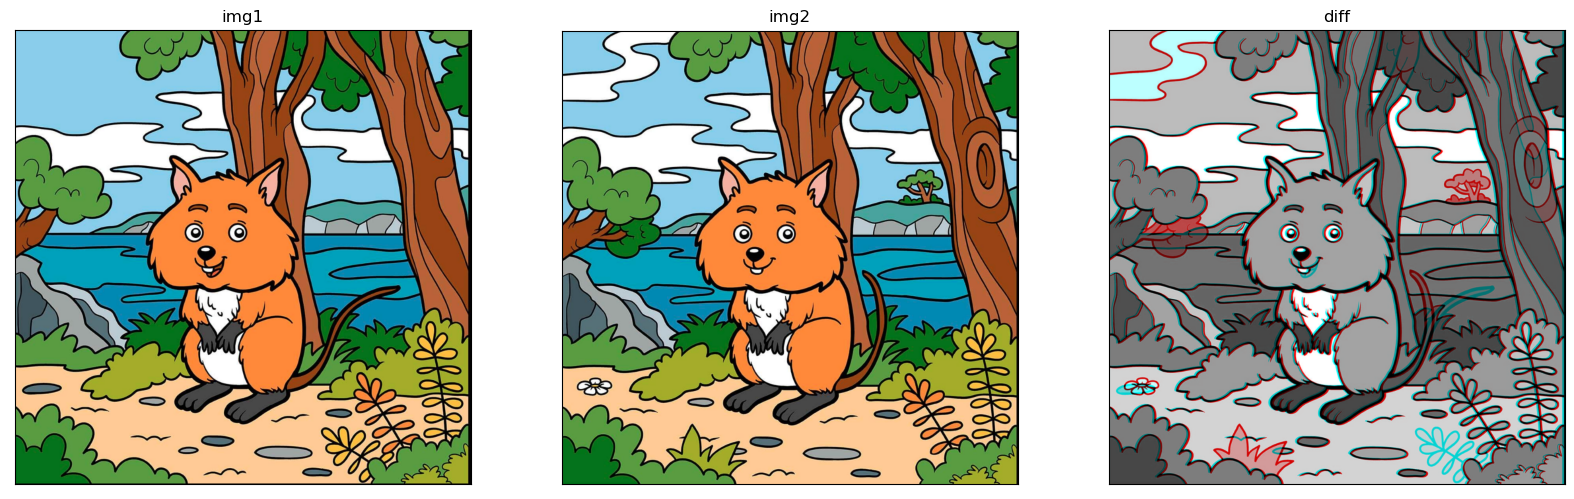

In [21]:
image_list = []

image1 = cv2.imread(os.path.join('images/Q1', '2.png'))
image_list.append([cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), 'img1', 'img'])
image2 = cv2.imread(os.path.join('images/Q1', '3.png'))
image_list.append([cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), 'img2', 'img'])

image1 = cv2.imread(os.path.join('images/Q1', '2.png'), cv2.IMREAD_GRAYSCALE) # (917, 921)
image2 = cv2.imread(os.path.join('images/Q1', '3.png'), cv2.IMREAD_GRAYSCALE) # (916, 922)
# crop images to the same size
image_list.append([dif(image1, image2), 'diff', 'img'])

plotter(image_list,1 , 3, True, 20, 10, '2B')